# Task 3

# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import dump, load
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16, 'axes.labelweight': 'bold', 'figure.figsize': (8,6)})
## add any other additional packages that you need. You are free to use any packages for vizualization.

## Part 1:

Recall as a final goal of this project. We want to build and deploy ensemble machine learning models in the cloud, where features are outputs of different climate models and the target is the actual rainfall observation. In this milestone, you'll actually build these ensemble machine learning models in the cloud.  

**Your tasks:**

1. Read the data CSV from your s3 bucket. 
2. Drop rows with nans. 
3. Split the data into train (80%) and test (20%) portions with `random_state=123`. 
4. Carry out EDA of your choice on the train split. 
5. Train ensemble machine learning model using `RandomForestRegressor` and evaluate with metric of your choice (e.g., `RMSE`) by considering `Observed` as the target column. 
6. Discuss your results. Are you getting better results with ensemble models compared to the individual climate models? 

> Recall that individual columns in the data are predictions of different climate models. 

In [2]:
## Depending on the permissions that you provided to your bucket you might need to provide your aws credentials
## to read from the bucket, if so provide with your credentials and pass as storage_options=aws_credentials
# aws_credentials = {"key": "","secret": "","token":""}
df = pd.read_csv("s3://mds-s3-group29/output/ml_data_SYD.csv", index_col=0, parse_dates=True)
df.head()

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1,observed_rainfall
0,0.040427,1.814552,35.579336,4.268112e+00,1.107466e-03,11.410537,3.322009e-08,2.668800,1.321215,1.515293,...,4.244226e-13,1.390174e-13,6.537884e-05,3.445495e-06,1.576096e+01,4.759651e-05,2.451075,0.221324,2.257933,0.006612
1,0.073777,0.303965,4.596520,1.190141e+00,1.015323e-04,4.014984,1.312700e+00,0.946211,2.788724,4.771375,...,4.409552e+00,1.222283e-01,1.049131e-13,4.791993e-09,3.675510e-01,4.350863e-01,0.477231,3.757179,2.287381,0.090422
2,0.232656,0.019976,5.927467,1.003845e-09,1.760345e-05,9.660565,9.103720e+00,0.431999,0.003672,4.233980,...,2.269300e-01,3.762301e-01,9.758706e-14,6.912302e-01,1.562869e-01,9.561101e+00,0.023083,0.253357,1.199909,1.401452
3,0.911319,13.623777,8.029624,8.225225e-02,1.808932e-01,3.951528,1.317160e+01,0.368693,0.013578,15.252495,...,2.344586e-02,4.214019e-01,7.060915e-03,3.835721e-02,2.472226e-07,5.301038e-01,0.002699,2.185454,2.106737,14.869798
4,0.698013,0.021048,2.132686,2.496841e+00,4.708019e-09,2.766362,1.822940e+01,0.339267,0.002468,11.920356,...,4.270161e-13,1.879692e-01,4.504985e+00,3.506923e-07,1.949792e-13,1.460928e-10,0.001026,2.766507,1.763335,0.467628


In [3]:
## Use your ML skills to get from step 1 to step 6

In [4]:
# drop rows with nans
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45989 entries, 0 to 46019
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ACCESS-CM2         45989 non-null  float64
 1   ACCESS-ESM1-5      45989 non-null  float64
 2   AWI-ESM-1-1-LR     45989 non-null  float64
 3   BCC-CSM2-MR        45989 non-null  float64
 4   BCC-ESM1           45989 non-null  float64
 5   CMCC-CM2-HR4       45989 non-null  float64
 6   CMCC-CM2-SR5       45989 non-null  float64
 7   CMCC-ESM2          45989 non-null  float64
 8   CanESM5            45989 non-null  float64
 9   EC-Earth3-Veg-LR   45989 non-null  float64
 10  FGOALS-g3          45989 non-null  float64
 11  GFDL-CM4           45989 non-null  float64
 12  INM-CM4-8          45989 non-null  float64
 13  INM-CM5-0          45989 non-null  float64
 14  KIOST-ESM          45989 non-null  float64
 15  MIROC6             45989 non-null  float64
 16  MPI-ESM-1-2-HAM    459

In [5]:
# Split the data into train (80%) and test (20%) portions with random_state=123.
train_df, test_df = train_test_split(df, test_size=0.2, random_state=123)

In [6]:
df.describe()

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1,observed_rainfall
count,45989.000000,45989.000000,4.598900e+04,4.598900e+04,4.598900e+04,45989.000000,4.598900e+04,4.598900e+04,45989.000000,4.598900e+04,...,4.598900e+04,4.598900e+04,4.598900e+04,4.598900e+04,4.598900e+04,45989.000000,45989.000000,4.598900e+04,4.598900e+04,45989.000000
mean,2.431806,2.912110,3.684362e+00,2.214373e+00,2.766260e+00,3.094129,3.592182e+00,3.498402e+00,2.906303,2.559391e+00,...,3.200653e+00,1.306521e+00,2.054750e+00,1.522577e+00,1.740391e+00,2.466659,2.874905,3.377089e+00,3.439387e+00,2.746271
std,6.805486,6.950376,7.215672e+00,6.519264e+00,6.046349e+00,6.428187,7.380218e+00,7.081748e+00,6.952669,5.745700e+00,...,6.925382e+00,4.883301e+00,5.374831e+00,4.950264e+00,4.873195e+00,5.840171,7.042097,7.917762e+00,7.578074e+00,8.188742
min,0.000000,0.000000,9.161142e-14,4.211430e-24,1.091904e-24,0.000000,-4.503054e-17,-3.186177e-19,0.000000,-9.934637e-19,...,3.315622e-13,1.088608e-13,9.155419e-14,9.479186e-33,1.426891e-13,0.000000,0.000000,-3.604673e-17,-2.148475e-14,0.000000
25%,0.053938,0.021419,2.869125e-02,5.258618e-04,2.486227e-03,0.138606,9.038497e-02,9.034570e-02,0.022485,1.220703e-02,...,1.181848e-04,1.270086e-13,1.353594e-13,5.553587e-05,1.864229e-13,0.005702,0.010022,3.691410e-02,4.943192e-02,0.008082
50%,0.191670,0.493374,5.882084e-01,9.767620e-02,2.956025e-01,0.639971,8.391182e-01,8.362362e-01,0.341963,4.316330e-01,...,2.072208e-01,1.599267e-03,1.153962e-01,3.210703e-02,5.181828e-02,0.171170,0.255601,6.518721e-01,6.720489e-01,0.163195
75%,1.432721,2.393983,3.587619e+00,1.336874e+00,2.503836e+00,3.198174,3.744974e+00,3.639139e+00,2.565126,2.296972e+00,...,2.699626e+00,3.534582e-01,1.192457e+00,6.729213e-01,7.935492e-01,1.841958,2.466907,3.270405e+00,3.236312e+00,1.633048
max,149.967634,157.605713,8.946575e+01,1.344652e+02,8.713472e+01,124.952390,1.401478e+02,1.375916e+02,135.569753,1.342262e+02,...,9.306766e+01,1.095008e+02,8.005998e+01,1.051568e+02,8.045783e+01,114.898109,163.164524,1.549718e+02,1.673562e+02,256.455080


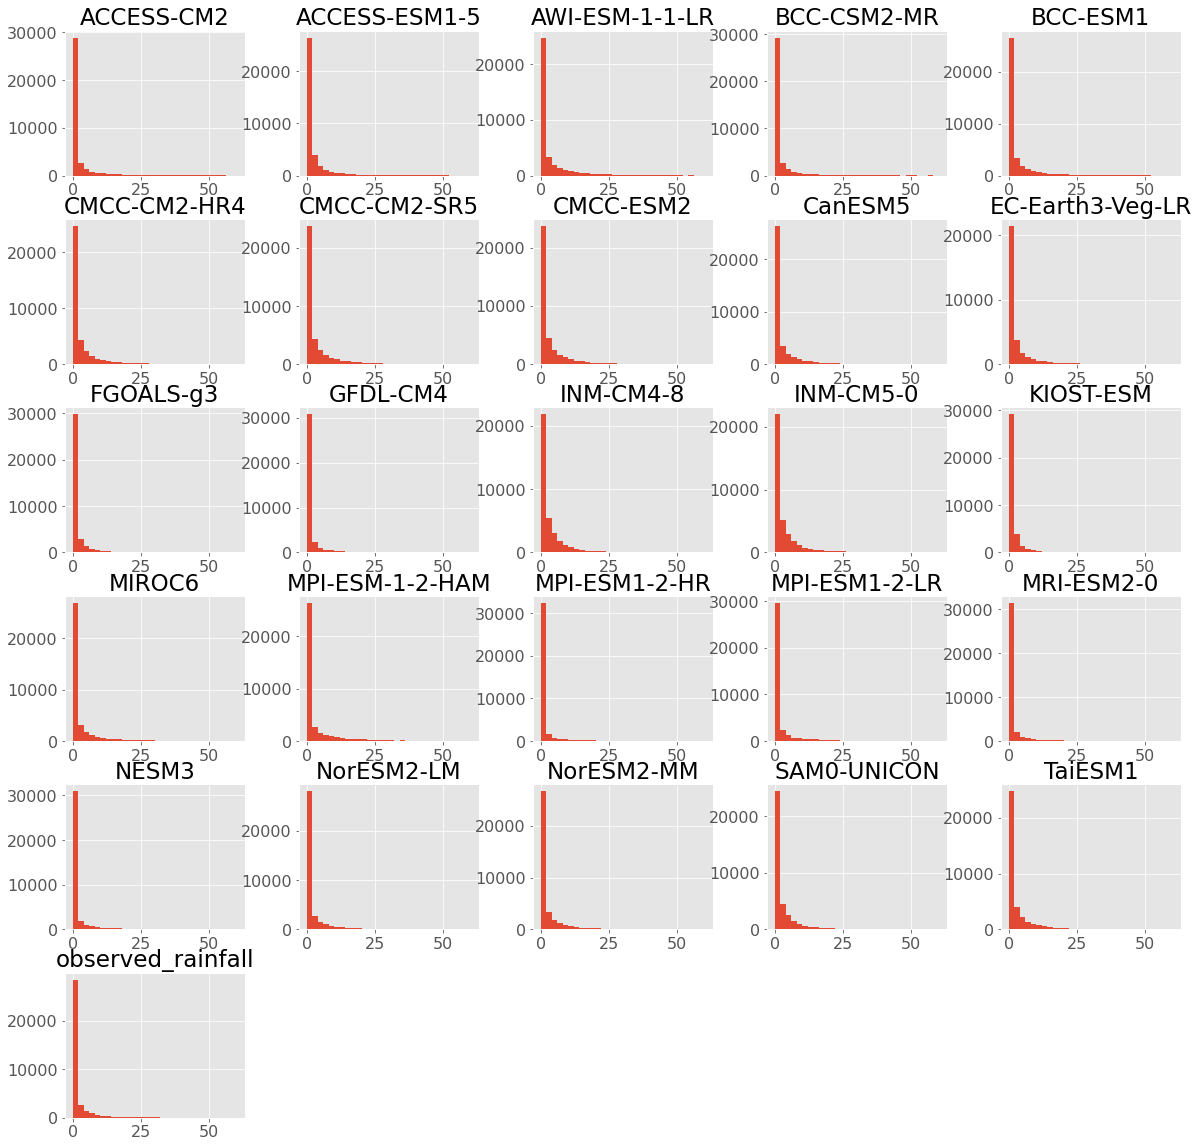

In [7]:
# EDA
train_df.hist(figsize=(20, 20), bins=30, range=[0, 60])
plt.show()

In [8]:
# Absence of covariation in correlation plot
corr = train_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,FGOALS-g3,GFDL-CM4,INM-CM4-8,INM-CM5-0,KIOST-ESM,MIROC6,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1,observed_rainfall
ACCESS-CM2,1.000000,0.004301,-0.002196,0.001120,0.012212,0.014959,0.013621,-0.001929,0.007494,0.016180,0.002982,0.009519,-0.006616,-0.004617,-0.003088,0.008132,0.015190,-0.002103,0.003325,-0.001989,-0.000679,0.015473,0.012199,0.002825,0.008217,-0.001819
ACCESS-ESM1-5,0.004301,1.000000,0.002516,-0.000938,0.006826,-0.002993,-0.001814,-0.000479,0.015096,0.007861,0.007836,-0.000706,0.002331,0.008184,0.011329,-0.002601,0.014543,0.002740,0.010092,0.000679,0.006235,-0.000263,0.004423,0.004642,0.008042,0.014944
AWI-ESM-1-1-LR,-0.002196,0.002516,1.000000,0.006778,0.001071,0.006790,0.008443,0.013938,0.011723,0.014522,0.007303,0.004090,0.014046,0.001924,0.009867,0.000716,0.022383,0.000692,0.013242,-0.007148,0.008226,-0.000067,0.003907,0.012480,0.012393,0.007980
BCC-CSM2-MR,0.001120,-0.000938,0.006778,1.000000,0.005123,0.002008,0.009563,0.010369,0.006881,0.009313,-0.006764,0.007932,0.011205,-0.002468,-0.006436,0.008237,0.005966,0.001597,0.000282,0.002052,0.017880,-0.004023,0.007445,0.006044,0.010858,0.019322
BCC-ESM1,0.012212,0.006826,0.001071,0.005123,1.000000,0.013169,0.007128,0.007559,0.002319,0.008151,-0.005910,0.011483,-0.005716,-0.008201,0.004186,0.005082,0.010383,0.000496,0.005589,-0.007730,0.012255,0.002084,0.000292,0.000181,0.012054,-0.002095
CMCC-CM2-HR4,0.014959,-0.002993,0.006790,0.002008,0.013169,1.000000,0.018048,0.028906,-0.002168,0.001551,0.014464,0.023038,-0.000466,0.010846,0.001342,-0.004927,0.000440,0.012643,0.003923,0.001001,0.024052,0.027495,0.005924,0.019143,0.032189,-0.000779
CMCC-CM2-SR5,0.013621,-0.001814,0.008443,0.009563,0.007128,0.018048,1.000000,0.015763,0.004703,0.006975,0.009183,0.028767,0.009904,0.004333,0.000720,-0.004942,-0.011926,0.014458,0.007409,-0.008899,0.029234,0.026755,0.012372,0.019419,0.021328,0.003907
CMCC-ESM2,-0.001929,-0.000479,0.013938,0.010369,0.007559,0.028906,0.015763,1.000000,-0.000963,0.018151,0.003465,0.014547,0.002860,0.011341,-0.006662,-0.004528,-0.005885,0.014692,0.011109,-0.001907,0.022093,0.019827,0.006402,0.013341,0.019474,0.005414
CanESM5,0.007494,0.015096,0.011723,0.006881,0.002319,-0.002168,0.004703,-0.000963,1.000000,0.008968,-0.000849,0.004366,0.004016,-0.012050,0.008642,-0.002592,0.022990,-0.003799,0.025278,0.002183,0.008598,0.003193,0.011492,0.005744,0.004696,0.010064
EC-Earth3-Veg-LR,0.016180,0.007861,0.014522,0.009313,0.008151,0.001551,0.006975,0.018151,0.008968,1.000000,0.004905,0.007828,0.007490,-0.001818,0.000571,0.003590,0.016401,0.009200,0.012275,-0.000223,0.012973,-0.004913,0.006460,0.014647,0.012603,0.001016


In [9]:
#Train ensemble machine learning model using RandomForestRegressor and evaluate with metric of your choice 
# by considering Observed as the target column. 
X_train, y_train = train_df.drop(columns=["observed_rainfall"]), train_df["observed_rainfall"]
X_test, y_test = test_df.drop(columns=["observed_rainfall"]), test_df["observed_rainfall"]

In [10]:
# Random forest model and MSE score
rf_pipe = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123))
rf_pipe.fit(X_train, y_train)
y_pred = rf_pipe.predict(X_test)
print(f"Mean squared error of the ensemble model is {round(mean_squared_error(y_test, y_pred), 2)} .")

Mean squared error of the ensemble model is 78.24 .


In [11]:
# Comparing ensemble result with individual models
from collections import defaultdict

scores = defaultdict()
for column in X_test.columns:
    scores[column] = round(mean_squared_error(y_test, X_test[column]), 2)

# Checking the MSE scores of existingi models
results = pd.DataFrame(scores, columns=X_test.columns, index = ["MSE"]).T
results.describe()

,MSE
count,25.00000
mean,116.68200
std,14.34814
min,92.17000
25%,108.37000
50%,115.81000
75%,126.48000
max,150.07000


As observed above, we are getting a MSE of 78.08 which is smaller than the minimumn MSE score achieved by all of the other models. This suggests having and ensemble model is actually working and we are getting better scores.

## Part 2:

### Preparation for deploying model next week

***NOTE: Complete task 4 from the milestone3 before coming here***

We’ve found the best hyperparameter settings with MLlib (from the task 4 from milestone3), here we then use the same hyperparameters to train a scikit-learn model. 

In [12]:
model = RandomForestRegressor(n_estimators=100, max_depth=5)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5)

In [13]:
print(f"Train RMSE: {mean_squared_error(y_train, model.predict(X_train), squared=False):.2f}")
print(f" Test RMSE: {mean_squared_error(y_test, model.predict(X_test), squared=False):.2f}")

Train RMSE: 7.90
 Test RMSE: 8.65


In [14]:
# ready to deploy
dump(model, "model.joblib")

['model.joblib']

***Upload model.joblib to s3 under output folder. You choose how you want to upload it (using CLI, SDK, or web console).***